# **PROBLEM STATEMENT**

#### Objective:
- To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:
- HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.
	


# **Data Dictionary**

![Screenshot 2024-12-27 103156.png](<attachment:Screenshot 2024-12-27 103156.png>)
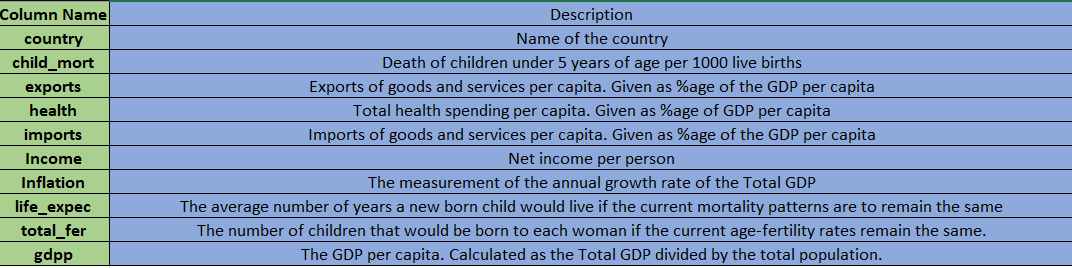

# **Solution**

- We will use the concept of Unsupervised learning and will try to find out the group of countries which need funds most and also give the detailed analysis  report . We will also create and application for the NGO, where they need to enter the details (Sociao - Economic Data) and it will predict what cluster this data belongs to   

In [143]:
# Library Importation

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [144]:
data = pd.read_csv('Country-data.csv')

In [145]:
data.set_index('country', inplace=True)

In [146]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [147]:
print(f'No Of Rows: {data.shape[0]}')
print(f'No Of Columns: {data.shape[1]}')


No Of Rows: 167
No Of Columns: 9


In [148]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [149]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


## **Correaltion Matrix**

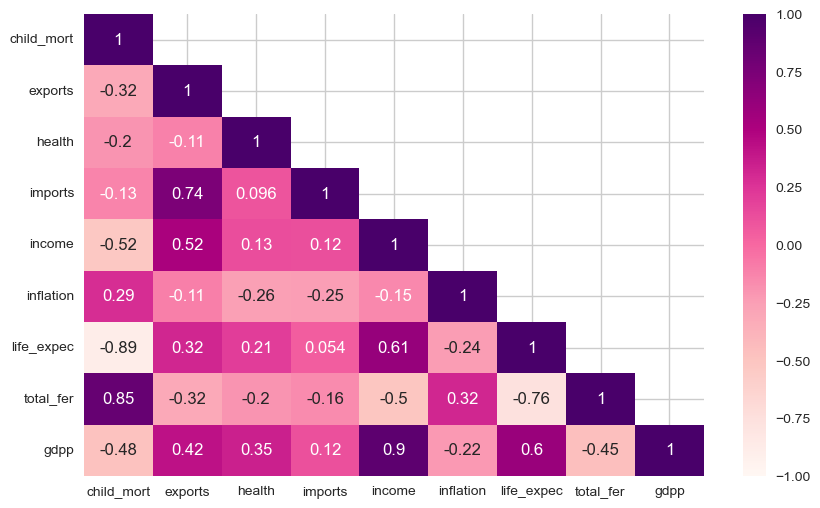

In [151]:
# Lets look at the correlation of heatmap to see the relationship between the variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, cmap='RdPu', mask = np.triu(data.corr(), k=1))
plt.show()

Inferences :

1. Countries with higher life Expectancy have significantly lower child mortality

2. Countries with higher Total Fertility have significantly higher child mortality

3. People living in COuntries with higher GDP/Population have higher Income.

4. People living in COuntries with higher Income higher have Life expectancy.

5. People living in COuntries with higher Income have Lower Child Mortality.




## **Visualizing the data**

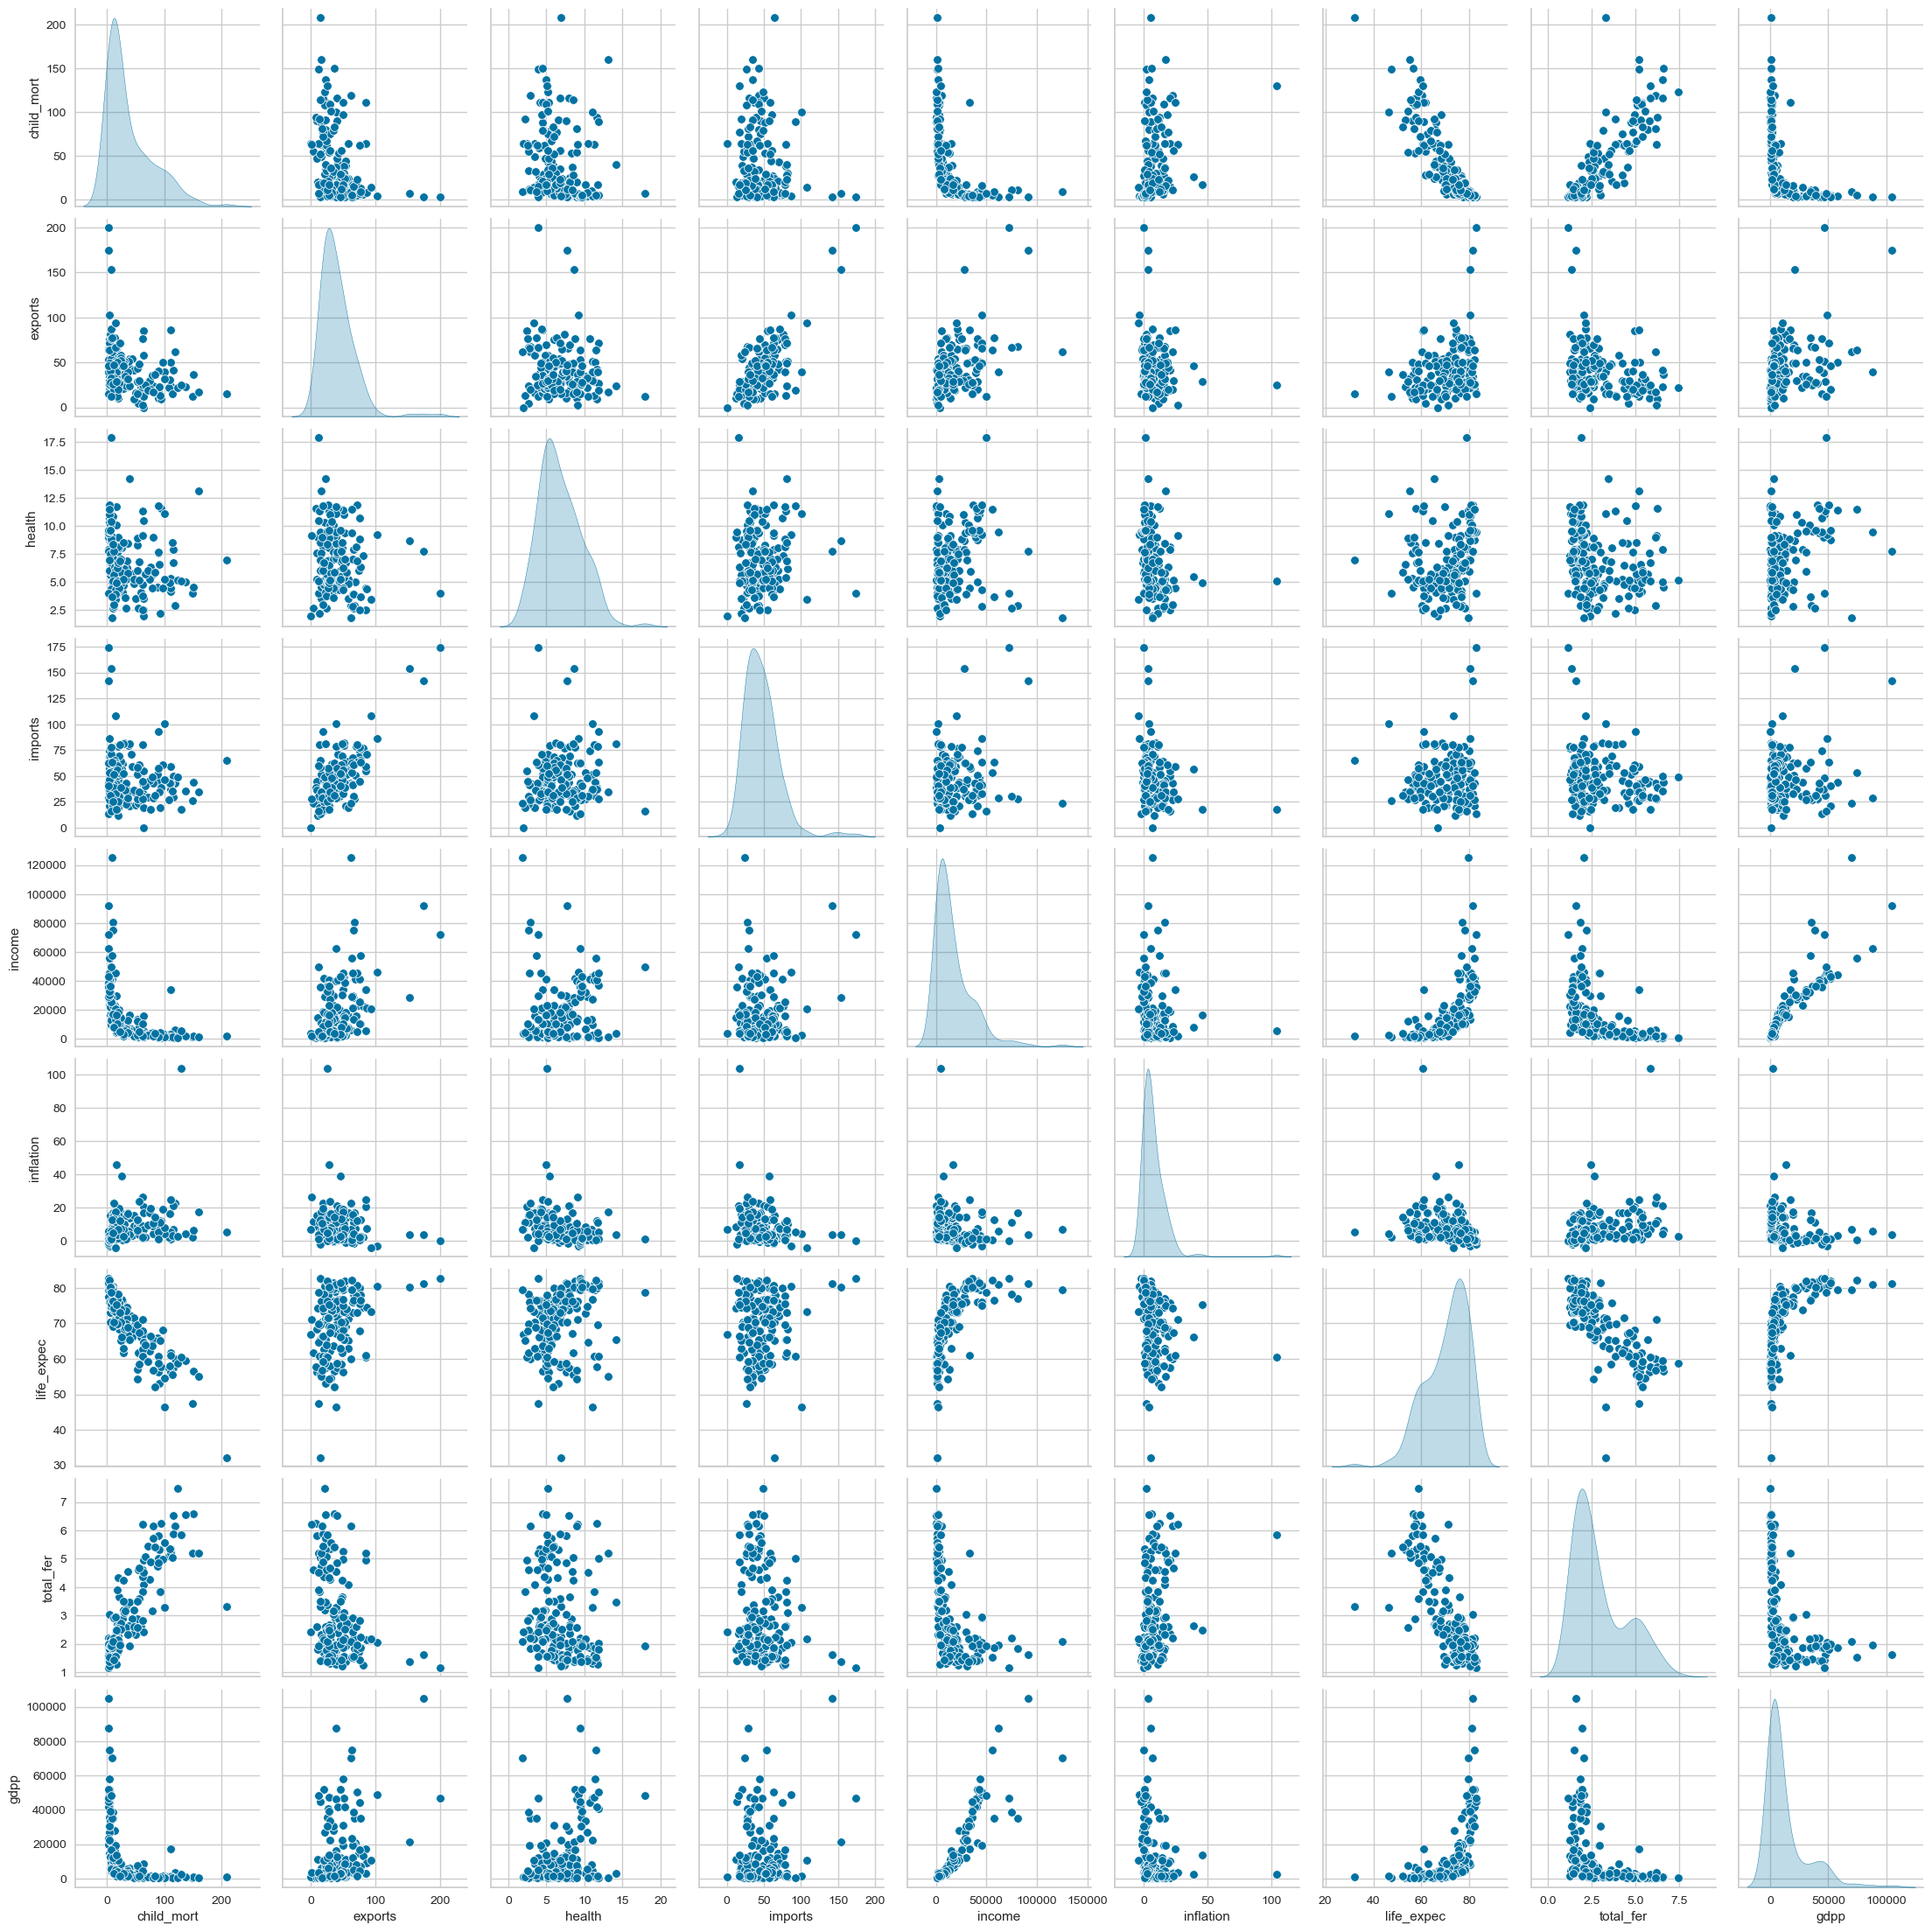

In [152]:
sns.pairplot(data, diag_kind='kde')
plt.show()

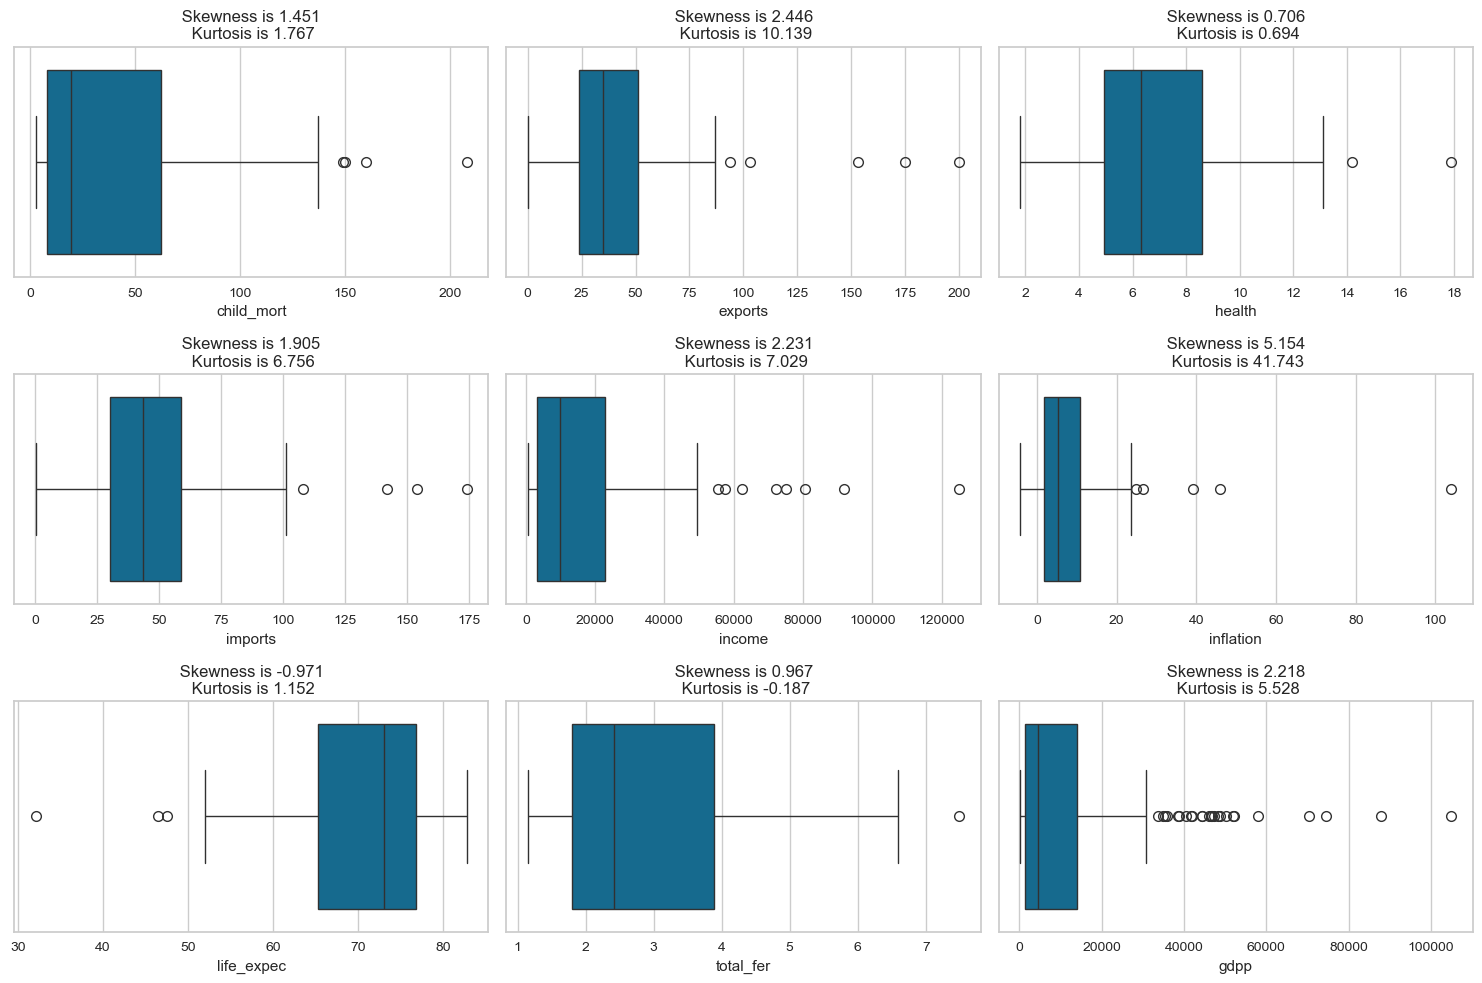

In [153]:
## Explore the Skewness, Kurtosis, Outliers of the data
plt.figure(figsize=(15, 10))
t = 1
for i in data:
    plt.subplot(3, 3, t)
    sns.boxplot(x = data[i])
    plt.title(f' Skewness is {round(data[i].skew(),3)} \n Kurtosis is {round(data[i].kurt(),3)}')
    t = t +1
plt.tight_layout()
plt.show()

## **Preprocessing**

In [154]:
# Lets check the duplicates

data.duplicated().sum()

0

In [155]:
# Lets check the Missing Values

data.isnull().sum().sum()

0

In [156]:
# Outlier Treatment

# Lets Cap the Outliers

for i in data:
    q3, q1 = np.quantile(data[i], [0.75, 0.25])
    iqr = q3 - q1
    ul = q3 + (2 * iqr)
    ll = q1 - (2 * iqr)
    data[i] = data[i].apply(lambda x: ul if x > ul else ll if x < ll else x)    

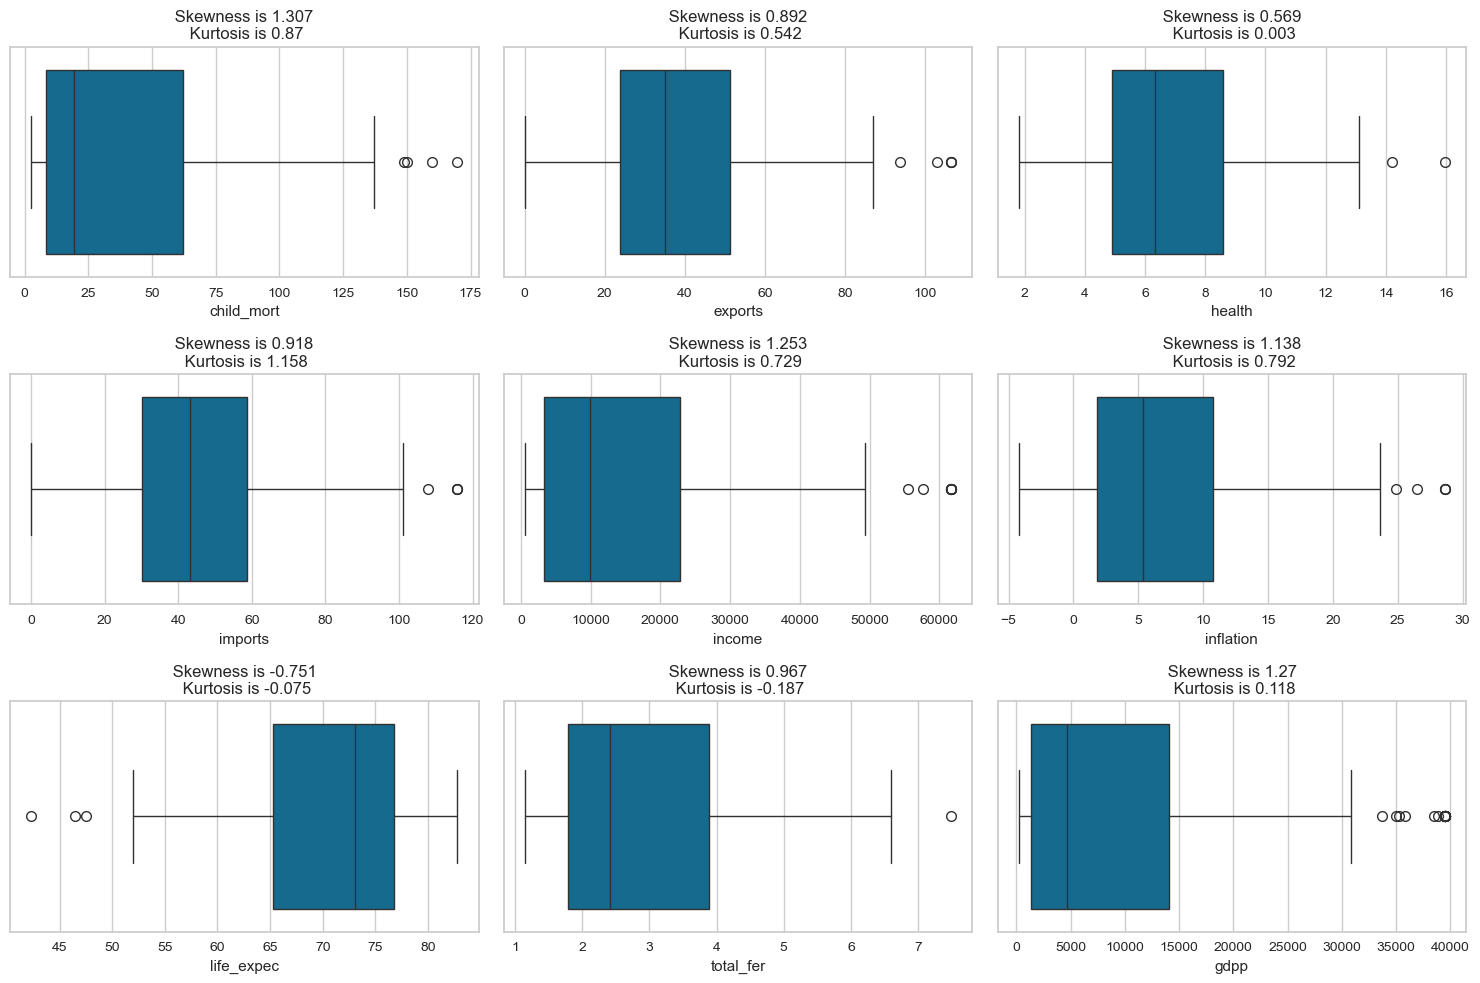

In [157]:
## Explore the Skewness, Kurtosis, Outliers of the data
plt.figure(figsize=(15, 10))
t = 1
for i in data:
    plt.subplot(3, 3, t)
    sns.boxplot(x = data[i])
    plt.title(f' Skewness is {round(data[i].skew(),3)} \n Kurtosis is {round(data[i].kurt(),3)}')
    t = t +1
plt.tight_layout()
plt.show()

In [158]:
# Lets Use the Scaling of data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [159]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [160]:
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
1,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
2,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362
3,2.057866,1.015243,-1.467008,-0.153900,-0.643479,2.188949,-1.218141,2.128151,-0.576385
4,-0.705149,0.255182,-0.287190,0.602137,0.171226,-0.822326,0.716194,-0.541946,0.076410


## **Reduce the Data Using PCA**

In [161]:
pca = PCA(n_components=9)
pca.fit(data_scaled)

PCA(n_components=9)

In [162]:
# Lets see how many Pc's we can have

pca.explained_variance_

array([4.36078478, 1.50181611, 1.23490898, 0.89728681, 0.59365874,
       0.1966251 , 0.14870828, 0.08513501, 0.03529306])

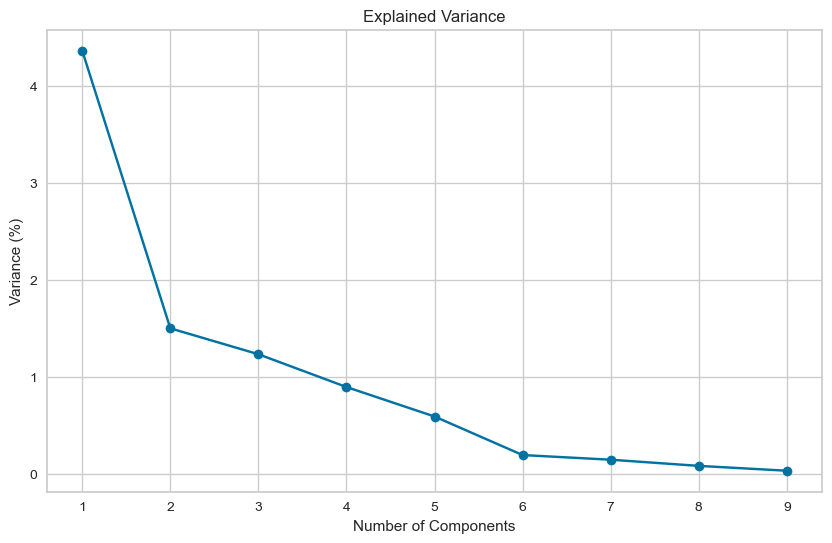

In [163]:
# Scree Plot

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), pca.explained_variance_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


In [164]:
# Explained Variance Ratio

pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

In [165]:
# Lets go with PCs which are explaining 95% of the variance

pca.explained_variance_ratio_.cumsum()

# Lets go with 5 PCs as they are explaining 95% of the variance

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

In [166]:
pca_final = PCA(n_components=5)
pca_data = pd.DataFrame(pca_final.fit_transform(data_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [167]:
pca_data.head(3)

,PC1,PC2,PC3,PC4,PC5
0,-3.099217,-0.232689,0.972447,0.787536,-0.009905
1,0.427427,-0.285346,0.242571,-1.377388,0.114011
2,-0.411658,-0.526613,-1.634043,-0.613283,0.459962


## **KMeans Clustering**

In [168]:
# Lets decide the value of K


# Look at the K elbow plot

kelbow = KElbowVisualizer(estimator=KMeans(), k = 10)

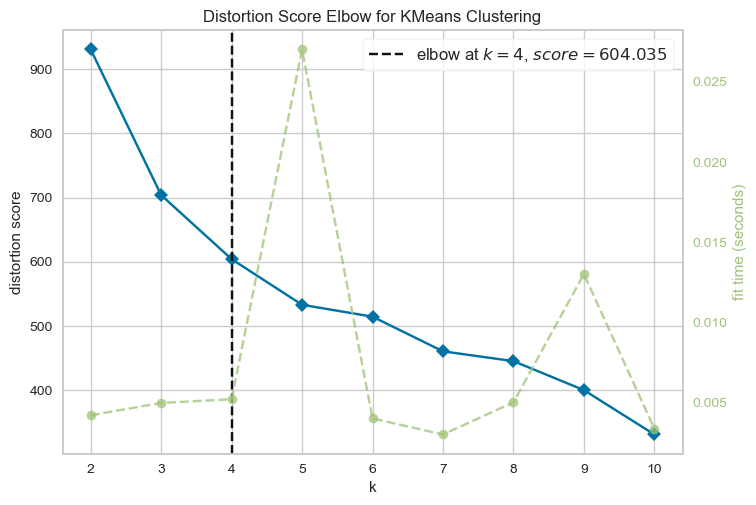

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [169]:
kelbow.fit(pca_data)
kelbow.show()

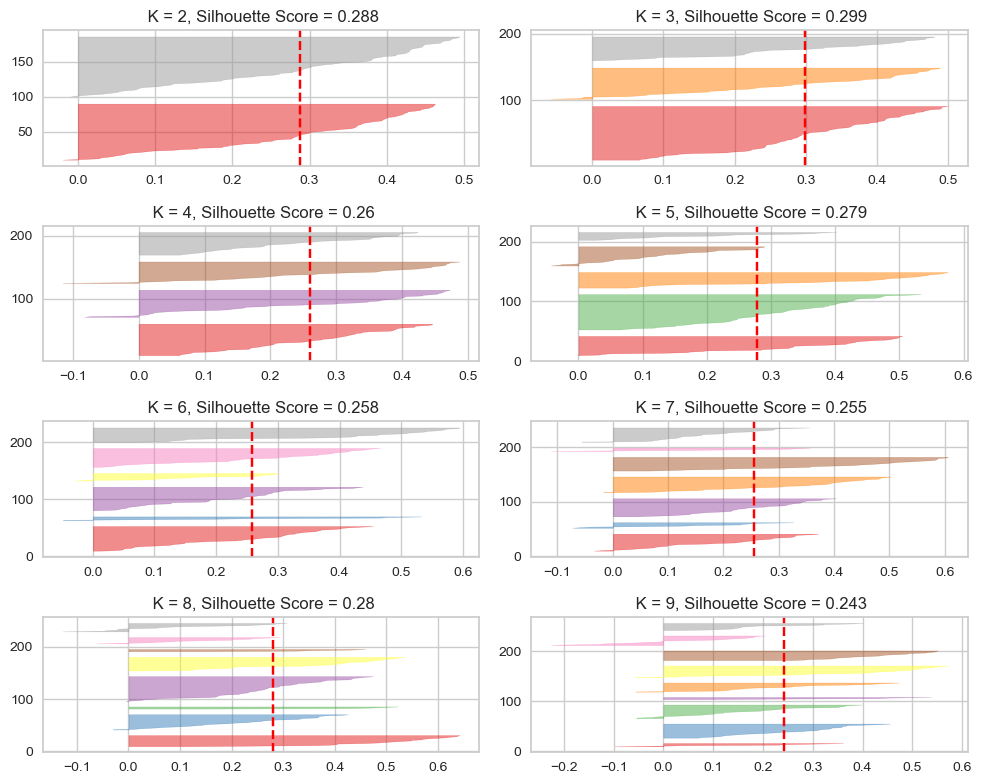

In [170]:
# Silhouette Visualizer
plt.figure(figsize=(10,8))
t = 1
for i in range(2,10):
    plt.subplot(4,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(estimator=model)
    sil_viz.fit(pca_data)
    plt.title(f' K = {i}, Silhouette Score = {round(sil_viz.silhouette_score_,3)}')
    t += 1
plt.tight_layout()
plt.show()

k = 2 and k = 3 are giving better cluster but silhouette score is slightly better in k = 3 also the cluster that are formed have fairly good distribution. lets go with k = 3

In [171]:
# Centroid 

centroid = kmeans.cluster_centers_
centroid

array([[-2.5308199 ,  0.10840405,  0.20904521,  0.63748954, -0.14282851],
       [ 2.86681026, -0.35670063,  0.14254351,  0.83051233, -0.23432848],
       [ 0.18789482,  0.09749425, -0.18668634, -0.74790798,  0.18934052]])

In [172]:
kmeans = KMeans(n_clusters=3, random_state=2)

labels = kmeans.fit_predict(pca_data)

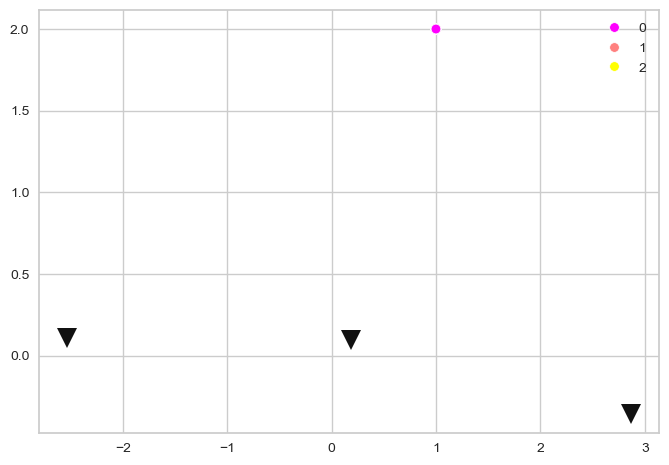

In [173]:
sns.scatterplot(data = pca_data, x = 1, y = 2, hue = labels, palette='spring')
for i in range(3):
    plt.plot(centroid[i][0], centroid[i][1], color = 'k', marker = 'v', ms = 15)
plt.show()

In [174]:
data['Label'] = labels

In [175]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2


In [176]:
data.groupby('Label').mean().T

Label,0,1,2
child_mort,91.570833,5.237838,21.508537
exports,28.546229,52.458108,40.797317
health,6.296458,8.730541,6.231951
imports,41.443040,47.971622,48.097561
income,3937.770833,41360.540541,12281.097561
inflation,10.345729,2.588432,7.365720
life_expec,59.558333,79.956757,72.875610
total_fer,4.953958,1.755676,2.311707
gdpp,1902.916667,34073.243243,6291.146341


## **Business Interpretation**

In [177]:
data['Label'] = data['Label'].apply(lambda x : 'Under-Developed' if x == 0 else 'Developing' if x == 2 else 'Developed')

In [178]:
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Under-Developed
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing


In [179]:
# Lets Looking at the developed Countries 

data[data['Label']== 'Developed']

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Australia,4.8,19.80,8.73,20.90,41400.0,1.160,82.0,1.93,39490.0,Developed
Austria,4.3,51.30,11.00,47.80,43200.0,0.873,80.5,1.44,39490.0,Developed
Bahamas,13.8,35.00,7.89,43.70,22900.0,-0.393,73.8,1.86,28000.0,Developed
Bahrain,8.6,69.50,4.97,50.90,41100.0,7.440,76.0,2.16,20700.0,Developed
Belgium,4.5,76.40,10.70,74.70,41100.0,1.880,80.0,1.86,39490.0,Developed
Brunei,10.5,67.40,2.84,28.00,61690.0,16.700,77.1,1.84,35300.0,Developed
Canada,5.6,29.10,11.30,31.00,40700.0,2.870,81.3,1.63,39490.0,Developed
Cyprus,3.6,50.20,5.97,57.50,33900.0,2.010,79.9,1.42,30800.0,Developed
Czech Republic,3.4,66.00,7.88,62.90,28300.0,-1.430,77.5,1.51,19800.0,Developed


In [180]:
# Lets Looking at the Under developed Countries 

data[data['Label']== 'Under-Developed']

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.000,7.58,44.9000,1610.0,9.440,56.2,5.82,553.0,Under-Developed
Angola,119.0,62.300,2.85,42.9000,5900.0,22.400,60.1,6.16,3530.0,Under-Developed
Benin,111.0,23.800,4.10,37.2000,1820.0,0.885,61.8,5.36,758.0,Under-Developed
Botswana,52.5,43.600,8.30,51.3000,13300.0,8.920,57.1,2.88,6350.0,Under-Developed
Burkina Faso,116.0,19.200,6.74,29.6000,1430.0,6.810,57.9,5.87,575.0,Under-Developed
Burundi,93.6,8.920,11.60,39.2000,764.0,12.300,57.7,6.26,231.0,Under-Developed
Cameroon,108.0,22.200,5.13,27.0000,2660.0,1.910,57.3,5.11,1310.0,Under-Developed
Central African Republic,149.0,11.800,3.98,26.5000,888.0,2.010,47.5,5.21,446.0,Under-Developed
Chad,150.0,36.800,4.53,43.5000,1930.0,6.390,56.5,6.59,897.0,Under-Developed


In [181]:
# Lets Looking at the developing Countries 

data[data['Label']== 'Developing']

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing
Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,Developing
Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,Developing
...,...,...,...,...,...,...,...,...,...,...
Uruguay,10.6,26.3,8.35,25.4,17100.0,4.91,76.4,2.08,11900.0,Developing
Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,Developing
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Developing


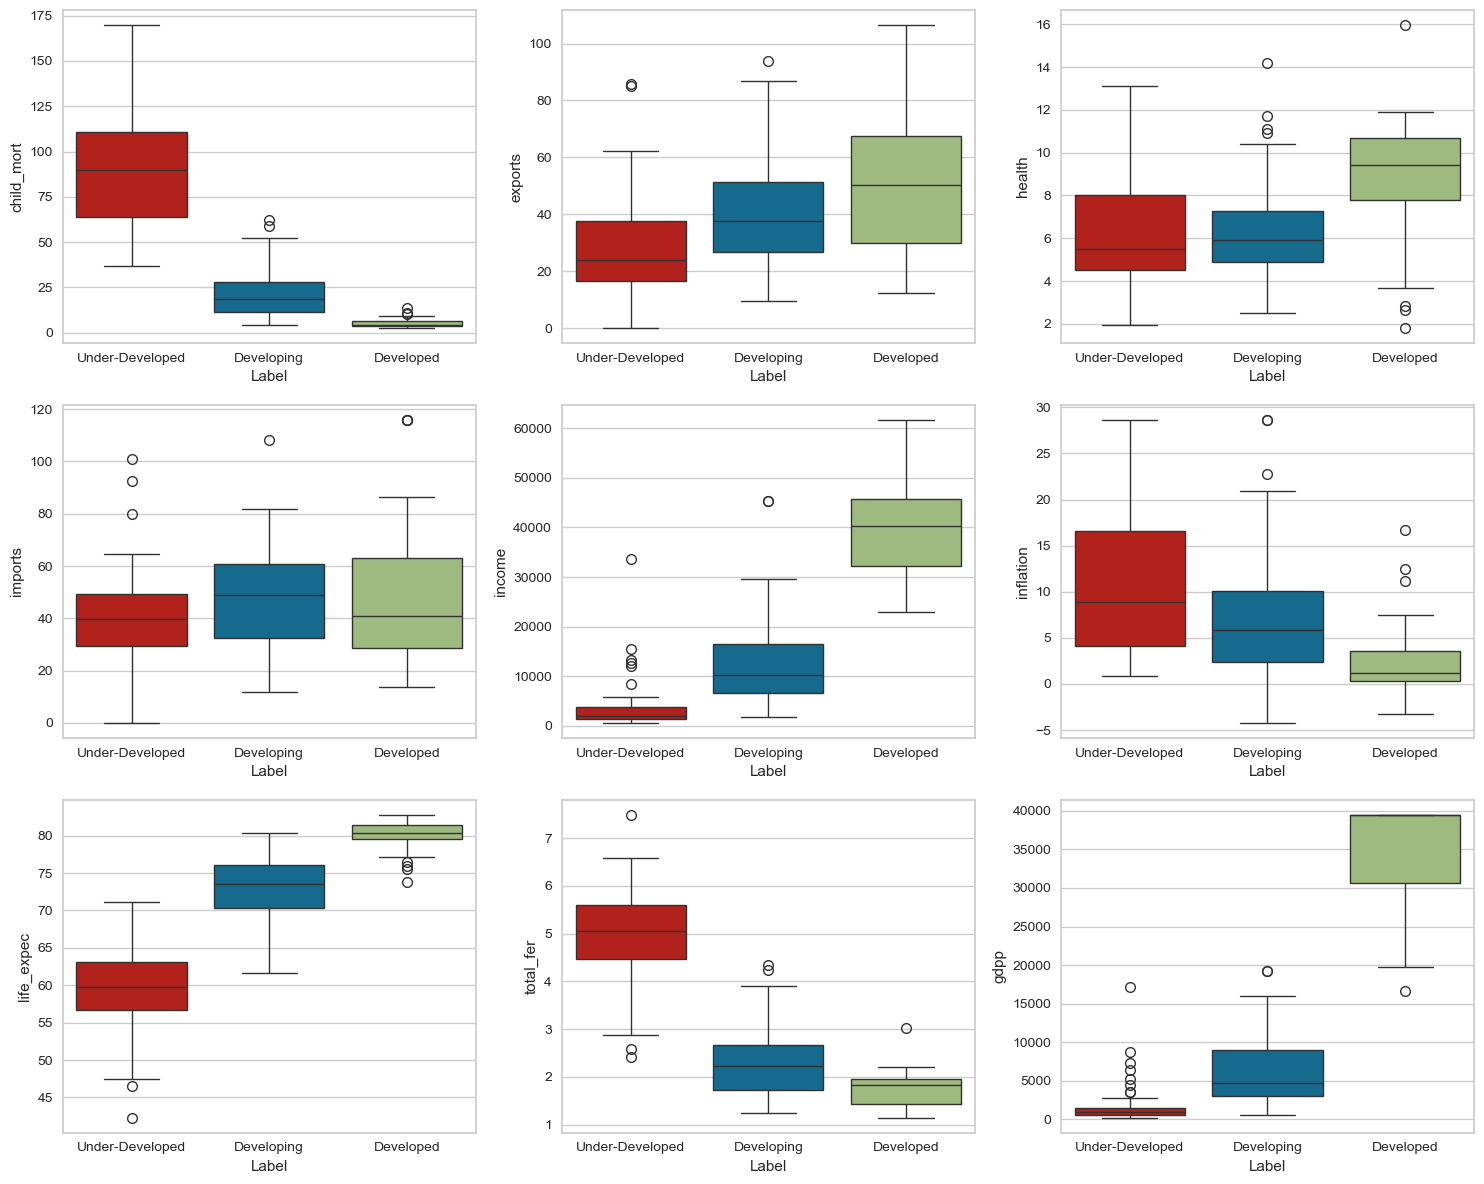

In [182]:
# lets visualize the clusters

t=1
plt.figure(figsize=(15,12))
for i in data:
    if i!= 'Label':
        plt.subplot(3,3,t)
        sns.boxplot(data=data,y=i,x='Label',palette=['r','b','g'])
        t+=1
plt.tight_layout()
plt.show()

In [183]:
# World Map Representation

px.choropleth(data_frame=data, locationmode='country names', locations= data.index, color = 'Label', color_discrete_map={'Developed' : 'forestgreen', 'Developing' : 'aqua', 'Under-Developed' : 'tomato'})

## **Deployment**

In [185]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.099217,-0.232689,0.972447,0.787536,-0.009905
1,0.427427,-0.285346,0.242571,-1.377388,0.114011
2,-0.411658,-0.526613,-1.634043,-0.613283,0.459962
3,-3.217072,1.229145,-1.983955,1.635771,0.159702
4,1.189011,0.479460,0.151955,-0.774114,-0.382475


In [186]:
# lets Download the instances that is required to deploy

import pickle

In [187]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open ('pca.pkl', 'wb') as file:
    pickle.dump(pca_final, file)

with open ('model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)